<a href="https://colab.research.google.com/github/chakirsami/Fashion-Retail-Sales-Data/blob/main/Fashion_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-5f449671dc66>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15_items, x="Purchase Amount (USD)", y="Item Purchased", palette="Blues_r")


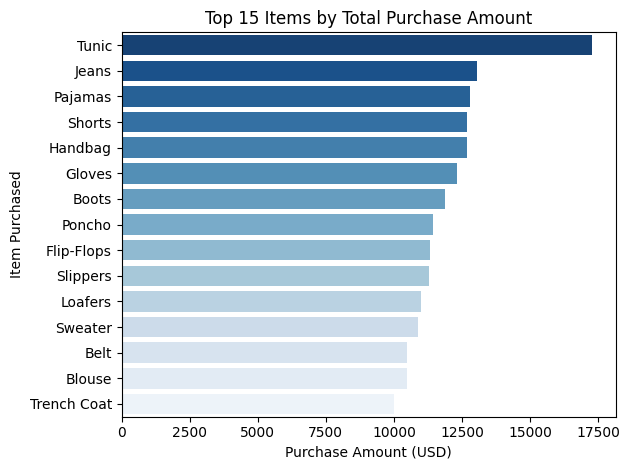

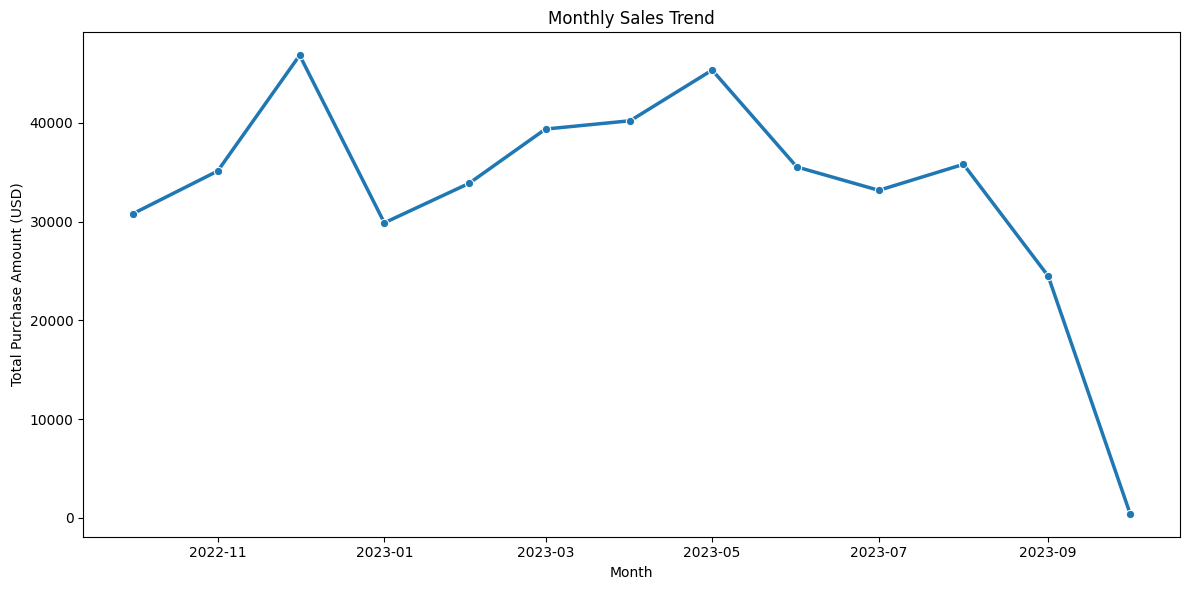

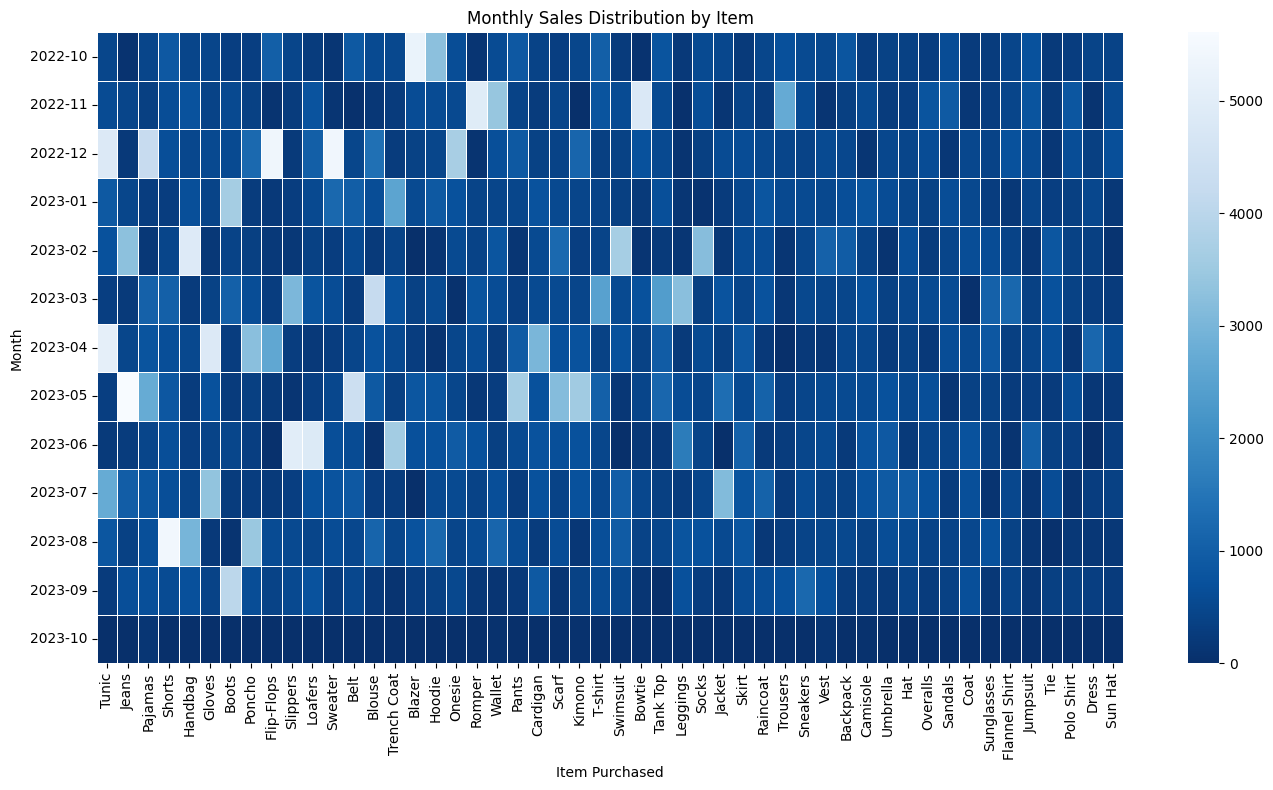

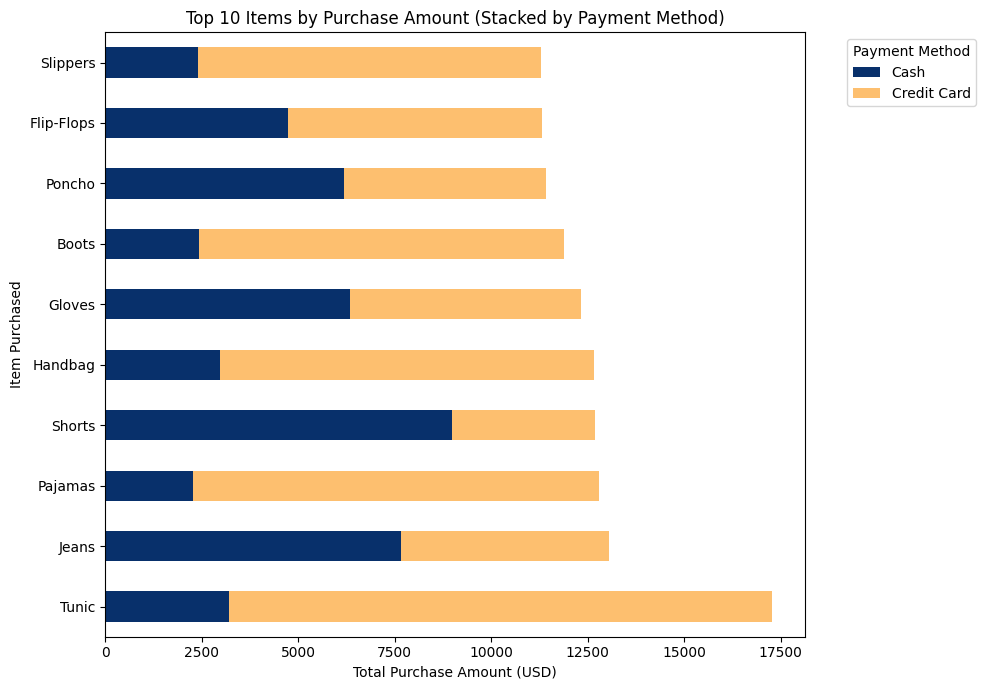

<ipython-input-2-5f449671dc66>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_compare = sns.barplot(


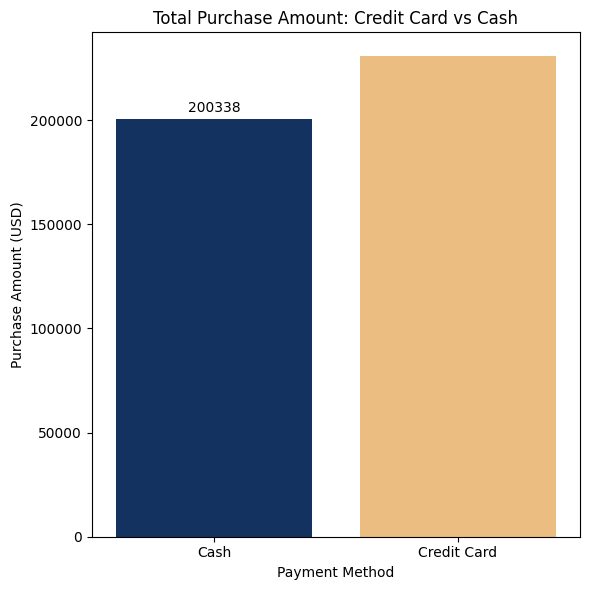

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Fashion_Retail_Sales.csv")
# Convert the 'Date Purchase' column to datetime format

df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], dayfirst=True)

# Aggregate purchase amount by item
item_sales = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending=False).reset_index()

# Filter to top 15 items
top15_items = item_sales.head(15)

# Plot top 15 items
sns.barplot(data=top15_items, x="Purchase Amount (USD)", y="Item Purchased", palette="Blues_r")
plt.title("Top 15 Items by Total Purchase Amount")
plt.tight_layout()
plt.show()

# Create a new column for the month and year
df['Month'] = df['Date Purchase'].dt.to_period('M').astype(str)

# Aggregate monthly sales
monthly_sales = df.groupby('Month')["Purchase Amount (USD)"].sum().reset_index()

# Sort by date
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales = monthly_sales.sort_values('Month')

# Plot 2: Line chart of monthly sales trend
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(
    data=monthly_sales,
    x='Month',
    y='Purchase Amount (USD)',
    marker='o',
    linewidth=2.5
)
line_plot.set_title("Monthly Sales Trend")
line_plot.set_ylabel("Total Purchase Amount (USD)")
line_plot.set_xlabel("Month")
plt.tight_layout()
plt.show()


# Group by Month and Item
monthly_item_sales = df.groupby([df['Date Purchase'].dt.to_period("M").astype(str), "Item Purchased"])["Purchase Amount (USD)"].sum().unstack(fill_value=0)

# Sort columns (items) by total sales descending
monthly_item_sales = monthly_item_sales.loc[:, monthly_item_sales.sum().sort_values(ascending=False).index]

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_item_sales, cmap="Blues_r", linewidths=0.5)
plt.title("Monthly Sales Distribution by Item")
plt.xlabel("Item Purchased")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

# Step 1: Group and pivot data for stacking
stacked_data = df.groupby(["Item Purchased", "Payment Method"])["Purchase Amount (USD)"].sum().unstack(fill_value=0)

# Step 2: Get top 10 items by total purchase amount
top_items = stacked_data.sum(axis=1).sort_values(ascending=False).head(10).index

# Step 3: Filter the dataset
stacked_top = stacked_data.loc[top_items]

# Step 4: Plot the stacked bar chart
stacked_top.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 7),
    color=["#08306B", "#FDBF6F"]
)
plt.title("Top 10 Items by Purchase Amount (Stacked by Payment Method)")
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Item Purchased")
plt.legend(title="Payment Method", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Aggregate total purchase amount by payment method (Cash and Credit Card only)
simple_payment = df[df["Payment Method"].isin(["Cash", "Credit Card"])]
payment_totals = simple_payment.groupby("Payment Method")["Purchase Amount (USD)"].sum().reset_index()

# Plot: Stylish bar chart comparing total purchases by payment method
plt.figure(figsize=(6, 6))
bar_compare = sns.barplot(
    data=payment_totals,
    x="Payment Method",
    y="Purchase Amount (USD)",
    palette=["#08306B", "#FDBF6F"]
)
bar_compare.set_title("Total Purchase Amount: Credit Card vs Cash")
bar_compare.bar_label(bar_compare.containers[0], fmt="%.0f", padding=3)
plt.tight_layout()
plt.show()
